# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Computer-arithmetics" data-toc-modified-id="Computer-arithmetics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Computer arithmetics</a></div><div class="lev2 toc-item"><a href="#Units-of-computer-storage" data-toc-modified-id="Units-of-computer-storage-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Units of computer storage</a></div><div class="lev2 toc-item"><a href="#Storage-of-Characters" data-toc-modified-id="Storage-of-Characters-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Storage of Characters</a></div><div class="lev2 toc-item"><a href="#Integers:-fixed-point-number-system" data-toc-modified-id="Integers:-fixed-point-number-system-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Integers: fixed-point number system</a></div><div class="lev3 toc-item"><a href="#Signed-integers" data-toc-modified-id="Signed-integers-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Signed integers</a></div><div class="lev3 toc-item"><a href="#Unsigned-integers" data-toc-modified-id="Unsigned-integers-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Unsigned integers</a></div><div class="lev3 toc-item"><a href="#BigInt" data-toc-modified-id="BigInt-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span><code>BigInt</code></a></div><div class="lev3 toc-item"><a href="#Overflow-and-underflow-for-integer-arithmetic" data-toc-modified-id="Overflow-and-underflow-for-integer-arithmetic-134"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Overflow and underflow for integer arithmetic</a></div><div class="lev2 toc-item"><a href="#Real-numbers:-floating-number-system" data-toc-modified-id="Real-numbers:-floating-number-system-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Real numbers: floating-number system</a></div><div class="lev3 toc-item"><a href="#Double-precision-(Float64)" data-toc-modified-id="Double-precision-(Float64)-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Double precision (Float64)</a></div><div class="lev3 toc-item"><a href="#Single-precision-(Float32)" data-toc-modified-id="Single-precision-(Float32)-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Single precision (Float32)</a></div><div class="lev3 toc-item"><a href="#Half-precision-(Float16)" data-toc-modified-id="Half-precision-(Float16)-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Half precision (Float16)</a></div><div class="lev3 toc-item"><a href="#Special-floating-point-numbers." data-toc-modified-id="Special-floating-point-numbers.-144"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Special floating-point numbers.</a></div><div class="lev3 toc-item"><a href="#Rounding" data-toc-modified-id="Rounding-145"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>Rounding</a></div><div class="lev3 toc-item"><a href="#Summary" data-toc-modified-id="Summary-146"><span class="toc-item-num">1.4.6&nbsp;&nbsp;</span>Summary</a></div><div class="lev3 toc-item"><a href="#Overflow-and-underflow-of-floating-point-number" data-toc-modified-id="Overflow-and-underflow-of-floating-point-number-147"><span class="toc-item-num">1.4.7&nbsp;&nbsp;</span>Overflow and underflow of floating-point number</a></div><div class="lev2 toc-item"><a href="#Catastrophic-cancellation" data-toc-modified-id="Catastrophic-cancellation-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Catastrophic cancellation</a></div><div class="lev3 toc-item"><a href="#Algebraic-laws" data-toc-modified-id="Algebraic-laws-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Algebraic laws</a></div><div class="lev2 toc-item"><a href="#Further-reading" data-toc-modified-id="Further-reading-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Further reading</a></div>

In [1]:
versioninfo()

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i7-6920HQ CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, skylake)
Environment:
  JULIA_EDITOR = code


# Computer arithmetics

## Units of computer storage

* `bit` = `binary` + `digit` (coined by statistician [John Tukey](https://en.wikipedia.org/wiki/Bit#History)).  
* `byte` = 8 bits.  
* KB = kilobyte = $10^3$ bytes.  
* MB = megabytes = $10^6$ bytes.  
* GB = gigabytes = $10^9$ bytes. Typical RAM size.  
* TB = terabytes = $10^{12}$ bytes. Typical hard drive size. Size of NYSE each trading session.    
* PB = petabytes = $10^{15}$ bytes.  
* EB = exabytes = $10^{18}$ bytes. Size of all healthcare data in 2011 is ~150 EB.    
* ZB = zetabytes = $10^{21}$ bytes. 

Julia function `Base.summarysize` shows the amount of memory (in bytes) used by an object.

In [2]:
x = rand(100, 100)
Base.summarysize(x)

80040

`varinfo()` function prints all variables in workspace and their sizes.

In [3]:
varinfo() # similar to Matlab whos()

| name |       size | summary                  |
|:---- | ----------:|:------------------------ |
| Base |            | Module                   |
| Core |            | Module                   |
| Main |            | Module                   |
| x    | 78.164 KiB | 100×100 Array{Float64,2} |


## Storage of Characters

* Plain text files are stored in the form of characters: `.jl`, `.r`, `.c`, `.cpp`, `.ipynb`, `.html`, `.tex`, ...  
* ASCII (American Code for Information Interchange): 7 bits, only $2^7=128$ characters.  

In [4]:
# integers 0, 1, ..., 127 and corresponding ascii character
[0:127 Char.(0:127)]

128×2 Array{Any,2}:
   0  '\0'  
   1  '\x01'
   2  '\x02'
   3  '\x03'
   4  '\x04'
   5  '\x05'
   6  '\x06'
   7  '\a'  
   8  '\b'  
   9  '\t'  
  10  '\n'  
  11  '\v'  
  12  '\f'  
   ⋮        
 116  't'   
 117  'u'   
 118  'v'   
 119  'w'   
 120  'x'   
 121  'y'   
 122  'z'   
 123  '{'   
 124  '|'   
 125  '}'   
 126  '~'   
 127  '\x7f'

* Extended ASCII: 8 bits, $2^8=256$ characters.  

In [5]:
# integers 128, 129, ..., 255 and corresponding extended ascii character
# show(STDOUT, "text/plain", [128:255 Char.(128:255)])
[128:255 Char.(128:255)]

128×2 Array{Any,2}:
 128  '\u80'
 129  '\u81'
 130  '\u82'
 131  '\u83'
 132  '\u84'
 133  '\u85'
 134  '\u86'
 135  '\u87'
 136  '\u88'
 137  '\u89'
 138  '\u8a'
 139  '\u8b'
 140  '\u8c'
   ⋮        
 244  'ô'   
 245  'õ'   
 246  'ö'   
 247  '÷'   
 248  'ø'   
 249  'ù'   
 250  'ú'   
 251  'û'   
 252  'ü'   
 253  'ý'   
 254  'þ'   
 255  'ÿ'   

* Unicode: UTF-8, UTF-16 and UTF-32 support many more characters including foreign characters; last 7 digits conform to ASCII. 

* [UTF-8](https://en.wikipedia.org/wiki/UTF-8) is the current dominant character encoding on internet.  

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c4/Utf8webgrowth.svg" width="500" align="center"/>

* Julia supports the full range of UTF-8 characters. You can type many Unicode math symbols by typing the backslashed LaTeX symbol name followed by tab. 

In [6]:
# \beta-<tab>
β = 0.0
# \beta-<tab>-\hat-<tab>
β̂ = 0.0

0.0

* For a table of unicode symbols that can be entered via tab completion of LaTeX-like abbreviations: <https://docs.julialang.org/en/v1.1/manual/unicode-input/#Unicode-Input-1>

## Integers: fixed-point number system

* Fixed-point number system is a computer model for integers $\mathbb{Z}$. 

* The number of bits and method of representing negative numbers vary from system to system. 
    - The `integer` type in R has $M=32$ or 64 bits, determined by machine word size. 
    - Matlab has `(u)int8`, `(u)int16`, `(u)int32`, `(u)int64`.  

* Julia has even more integer types. Using Tom Breloff's `Plots.jl` and `GraphRecipes.jl` packages, we can [visualize the type tree](http://www.breloff.com/Graphs/) under `Integer`
    - Storage for a `Signed` or `Unsigned` integer can be $M = 8, 16, 32, 64$ or 128 bits.  
    - GraphRecipes.jl package has a convenience function for plotting the type hiearchy.

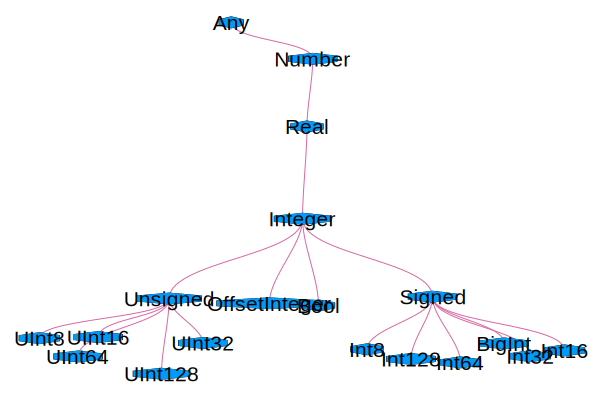

In [7]:
using GraphRecipes, Plots

#pyplot(size=(800, 600))
gr(size=(600, 400))
theme(:default)

plot(Integer, method=:tree, fontsize=4)

### Signed integers

* First bit indicates sign.  
    - `0` for nonnegative numbers
    - `1` for negative numbers  
    
* **Two's complement representation** for negative numbers. 
    - Sign bit is set to 1  
    - remaining bits are set to opposite values  
    - 1 is added to the result  
    - Two's complement representation of a negative integer `x` is same as the unsigned integer `2^64 + x`.

In [8]:
@show typeof(18)
@show bitstring(18)
@show bitstring(-18)
@show bitstring(UInt64(Int128(2)^64 - 18)) == bitstring(-18)
@show bitstring(2 * 18) # shift bits of 18
@show bitstring(2 * -18); # shift bits of -18

typeof(18) = Int64
bitstring(18) = "0000000000000000000000000000000000000000000000000000000000010010"
bitstring(-18) = "1111111111111111111111111111111111111111111111111111111111101110"
bitstring(UInt64(Int128(2) ^ 64 - 18)) == bitstring(-18) = true
bitstring(2 * 18) = "0000000000000000000000000000000000000000000000000000000000100100"
bitstring(2 * -18) = "1111111111111111111111111111111111111111111111111111111111011100"


* Two's complement representation respects modular arithmetic nicely.  
    Addition of any two signed integers are just bitwise addition, possibly modulo $2^M$
    
<img src="http://users.dickinson.edu/~braught/courses/cs251f02/classes/images/twosCompWheel.png" width="400" align="center"/>    

* **Range** of representable integers by $M$-bit **signed integer** is $[-2^{M-1},2^{M-1}-1]$.
    - Julia functions `typemin(T)` and `typemax(T)` give the lowest and highest representable number of a type `T` respectively

In [9]:
typemin(Int64), typemax(Int64)

(-9223372036854775808, 9223372036854775807)

In [10]:
for T in [Int8, Int16, Int32, Int64, Int128]
    println(T, '\t', typemin(T), '\t', typemax(T))
end

Int8	-128	127
Int16	-32768	32767
Int32	-2147483648	2147483647
Int64	-9223372036854775808	9223372036854775807
Int128	-170141183460469231731687303715884105728	170141183460469231731687303715884105727


### Unsigned integers

* For unsigned integers, the range is $[0,2^M-1]$.

In [11]:
for t in [UInt8, UInt16, UInt32, UInt64, UInt128]
    println(t, '\t', typemin(t), '\t', typemax(t))
end

UInt8	0	255
UInt16	0	65535
UInt32	0	4294967295
UInt64	0	18446744073709551615
UInt128	0	340282366920938463463374607431768211455


### `BigInt`

Julia `BigInt` type is arbitrary precision.

In [12]:
@show typemax(Int128)
@show typemax(Int128) + 1 # modular arithmetic!
@show BigInt(typemax(Int128)) + 1;

typemax(Int128) = 170141183460469231731687303715884105727
typemax(Int128) + 1 = -170141183460469231731687303715884105728
BigInt(typemax(Int128)) + 1 = 170141183460469231731687303715884105728


### Overflow and underflow for integer arithmetic

R reports `NA` for integer overflow and underflow.  
**Julia outputs the result according to modular arithmetic.**

In [13]:
@show typemax(Int32)
@show typemax(Int32) + Int32(1); # modular arithmetics!

typemax(Int32) = 2147483647
typemax(Int32) + Int32(1) = -2147483648


In [14]:
using RCall

R"""
.Machine$integer.max
"""

RObject{IntSxp}
[1] 2147483647


In [15]:
R"""
M <- 32
big <- 2^(M-1) - 1
as.integer(big)
"""

RObject{IntSxp}
[1] 2147483647


In [16]:
R"""
as.integer(big+1)
"""

┌ Warning: RCall.jl: Warning: NAs introduced by coercion to integer range
└ @ RCall /Users/huazhou/.julia/packages/RCall/ffM0W/src/io.jl:113


RObject{IntSxp}
[1] NA


## Real numbers: floating-number system

Floating-point number system is a computer model for real numbers.

* Most computer systems adopt the [IEEE 754 standard](https://en.wikipedia.org/wiki/IEEE_floating_point), established in 1985, for floating-point arithmetics.  
For the history, see an [interview with William Kahan](http://www.cs.berkeley.edu/~wkahan/ieee754status/754story.html).

* In the scientific notation, a real number is represented as
$$\pm d_0.d_1d_2 \cdots d_p \times b^e.$$
In computer, the _base_ is $b=2$ and the digits $d_i$ are 0 or 1.

* **Normalized** vs **denormalized** numbers. For example, decimal number 18 is
$$ +1.0010 \times 2^4 \quad (\text{normalized})$$
or, equivalently,
$$ +0.1001 \times 2^5 \quad (\text{denormalized}).$$

* In the floating-number system, computer stores 
    - sign bit  
    - the _fraction_ (or _mantissa_, or _significand_) of the **normalized** representation
    - the actual exponent _plus_ a bias

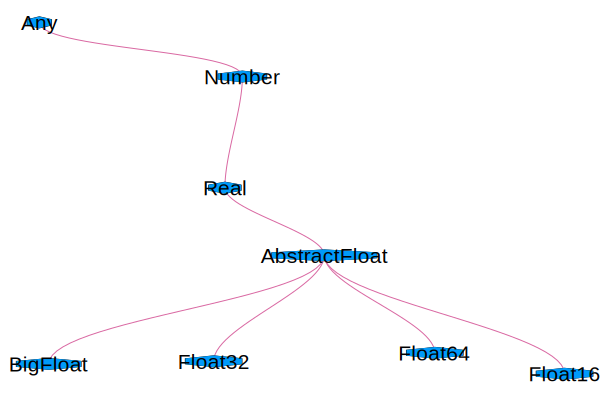

In [17]:
using GraphRecipes, Plots

#pyplot(size=(800, 600))
gr(size=(600, 400))
theme(:default)

plot(AbstractFloat, method=:tree, fontsize=4)

### Double precision (Float64)

<img src="./double-precision-numbers.png" width="500" align="center"/>

- Double precision (64 bits = 8 bytes) numbers are the dominant data type in scientific computing.
      
- In Julia, `Float64` is the type for double precision numbers.    

- First bit is sign bit.  

- $p=52$ significant bits.

- 11 exponent bits: $e_{\max}=1023$, $e_{\min}=-1022$, **bias**=1023.  

- $e_{\text{min}}-1$ and $e_{\text{max}}+1$ are reserved for special numbers.  

- range of **magnitude**: $10^{\pm 308}$ in decimal because $\log_{10} (2^{1023}) \approx 308$.  

- **precision** to the $\log_{10}(2^{-52}) \approx 15$ decimal point.

In [18]:
println("Double precision:")
@show bitstring(Float64(18)) # 18 in double precision
@show bitstring(Float64(-18)); # -18 in double precision

Double precision:
bitstring(Float64(18)) = "0100000000110010000000000000000000000000000000000000000000000000"
bitstring(Float64(-18)) = "1100000000110010000000000000000000000000000000000000000000000000"


### Single precision (Float32)

<img src="./single-precision-numbers.png" width="500" align="center"/>

- In Julia, `Float32` is the type for single precision numbers.  

- First bit is sign bit.  

- $p=23$ significant bits.  

- 8 exponent bits: $e_{\max}=127$, $e_{\min}=-126$, **bias**=127.  

- $e_{\text{min}}-1$ and $e_{\text{max}}+1$ are reserved for special numbers.  

- range of **magnitude**: $10^{\pm 38}$ in decimal because $\log_{10} (2^{127}) \approx 38$.

- **precision**: $\log_{10}(2^{23}) \approx 7$ decimal point.  

In [19]:
println("Single precision:")
@show bitstring(Float32(18.0)) # 18 in single precision
@show bitstring(Float32(-18.0)); # -18 in single precision

Single precision:
bitstring(Float32(18.0)) = "01000001100100000000000000000000"
bitstring(Float32(-18.0)) = "11000001100100000000000000000000"


### Half precision (Float16)

<img src="./half-precision-numbers.png" width="200" align="center"/>
    
- In Julia, `Float16` is the type for half precision numbers.

- First bit is sign bit.  

- $p=10$ significant bits.  

- 5 exponent bits: $e_{\max}=15$, $e_{\min}=-14$, bias=15.  

- $e_{\text{min}}-1$ and $e_{\text{max}}+1$ are reserved for special numbers.  

- range of **magnitude**: $10^{\pm 4}$ in decimal because $\log_{10} (2^{15}) \approx 4$.  

- **precision**: $\log_{10}(2^{10}) \approx 3$ decimal point.      

In [20]:
println("Half precision:")
@show bitstring(Float16(18)) # 18 in half precision
@show bitstring(Float16(-18)); # -18 in half precision

Half precision:
bitstring(Float16(18)) = "0100110010000000"
bitstring(Float16(-18)) = "1100110010000000"


### Special floating-point numbers. 

- Exponent $e_{\max}+1$ plus a zero mantissa means $\pm \infty$.

In [21]:
@show bitstring(Inf) # Inf in double precision
@show bitstring(-Inf); # -Inf in double precision

bitstring(Inf) = "0111111111110000000000000000000000000000000000000000000000000000"
bitstring(-Inf) = "1111111111110000000000000000000000000000000000000000000000000000"


- Exponent $e_{\max}+1$ plus a nonzero mantissa means `NaN`. `NaN` could be produced from `0 / 0`, `0 * Inf`, ...  

- In general `NaN ≠ NaN` bitwise. Test whether a number is `NaN` by `isnan` function.  

In [22]:
@show bitstring(0 / 0) # NaN
@show bitstring(0 * Inf); # NaN

bitstring(0 / 0) = "1111111111111000000000000000000000000000000000000000000000000000"
bitstring(0Inf) = "1111111111111000000000000000000000000000000000000000000000000000"


- Exponent $e_{\min}-1$ with a zero mantissa represents the real number 0.  

In [23]:
@show bitstring(0.0); # 0 in double precision 

bitstring(0.0) = "0000000000000000000000000000000000000000000000000000000000000000"


- Exponent $e_{\min}-1$ with a nonzero mantissa are for numbers less than $b^{e_{\min}}$.  
    Numbers are _denormalized_ in the range $(0,b^{e_{\min}})$ -- **graceful underflow**. 

In [24]:
@show nextfloat(0.0) # next representable number
@show bitstring(nextfloat(0.0)); # denormalized

nextfloat(0.0) = 5.0e-324
bitstring(nextfloat(0.0)) = "0000000000000000000000000000000000000000000000000000000000000001"


### Rounding

* Rounding is necessary whenever a number has more than $p$ significand bits. Most computer systems use the default IEEE 754 _round to nearest_ mode (also called _ties to even_ mode). Julia offers several [rounding modes](https://docs.julialang.org/en/v1/base/math/#Base.Rounding.RoundingMode), the default being [`RoundNearest`](https://docs.julialang.org/en/v1/base/math/#Base.Rounding.RoundNearest). For example, the number 0.1 in decimal system cannot be represented accurately as a floating point number:
$$ 0.1 = 1.10011001... \times 2^{-4} $$

In [25]:
@show bitstring(0.1f0) # single precision Float32, 1001 gets rounded to 101(0)
@show bitstring(0.1);  # double precision Float64

bitstring(0.1f0) = "00111101110011001100110011001101"
bitstring(0.1) = "0011111110111001100110011001100110011001100110011001100110011010"


### Summary

- Single precision: range $\pm 10^{\pm 38}$ with precision up to 7 decimal digits.

- Double precision: range $\pm 10^{\pm 308}$ with precision up to 16 decimal digits.  

- The floating-point numbers do not occur uniformly over the real number line
    <img src="http://www.volkerschatz.com/science/pics/fltscale-wh.png" width="700" align="center"/>
    Each magnitude has same number of representible numbers
    
- **Machine epsilons** are the spacings of numbers around 1: 
    $$\epsilon_{\min}=b^{-p}, \quad  \epsilon_{\max} = b^{1-p}.$$
    <img src="./machine_epsilons.png" width="500" align="center"/>

In [26]:
@show eps(Float32)  # machine epsilon for a floating point type
@show eps(Float64)  # same as eps()
# eps(x) is the spacing after x
@show eps(100.0)
@show eps(0.0)
# nextfloat(x) and prevfloat(x) give the neighbors of x
@show x = 1.25f0
@show prevfloat(x), x, nextfloat(x)
@show bitstring(prevfloat(x)), bitstring(x), bitstring(nextfloat(x));

eps(Float32) = 1.1920929f-7
eps(Float64) = 2.220446049250313e-16
eps(100.0) = 1.4210854715202004e-14
eps(0.0) = 5.0e-324
x = 1.25f0 = 1.25f0
(prevfloat(x), x, nextfloat(x)) = (1.2499999f0, 1.25f0, 1.2500001f0)
(bitstring(prevfloat(x)), bitstring(x), bitstring(nextfloat(x))) = ("00111111100111111111111111111111", "00111111101000000000000000000000", "00111111101000000000000000000001")


* In R, the variable `.Machine` contains numerical characteristics of the machine.

In [27]:
R"""
.Machine
"""

RObject{VecSxp}
$double.eps
[1] 2.220446e-16

$double.neg.eps
[1] 1.110223e-16

$double.xmin
[1] 2.225074e-308

$double.xmax
[1] 1.797693e+308

$double.base
[1] 2

$double.digits
[1] 53

$double.rounding
[1] 5

$double.guard
[1] 0

$double.ulp.digits
[1] -52

$double.neg.ulp.digits
[1] -53

$double.exponent
[1] 11

$double.min.exp
[1] -1022

$double.max.exp
[1] 1024

$integer.max
[1] 2147483647

$sizeof.long
[1] 8

$sizeof.longlong
[1] 8

$sizeof.longdouble
[1] 16

$sizeof.pointer
[1] 8



* Julia provides `Float16` (half precision), `Float32` (single precision), `Float64` (double precision), and `BigFloat` (arbitrary precision).

### Overflow and underflow of floating-point number

* For double precision, the range is $\pm 10^{\pm 308}$. In most situations, underflow (magnitude of result is less than $10^{-308}$) is preferred over overflow (magnitude of result is larger than $10^{-308}$). Overflow produces $\pm \inf$. Underflow yields zeros or denormalized numbers. 

* E.g., the logit link function is
$$p = \frac{\exp (x^T \beta)}{1 + \exp (x^T \beta)} = \frac{1}{1+\exp(- x^T \beta)}.$$
The former expression can easily lead to `Inf / Inf = NaN`, while the latter expression leads to graceful underflow.

* `floatmin` and `floatmax` functions gives largest and smallest _finite_ number represented by a type.

In [28]:
for T in [Float16, Float32, Float64]
    println(T, '\t', floatmin(T), '\t', floatmax(T), '\t', typemin(T), 
        '\t', typemax(T), '\t', eps(T))
end

Float16	6.104e-5	6.55e4	-Inf	Inf	0.000977
Float32	1.1754944e-38	3.4028235e38	-Inf	Inf	1.1920929e-7
Float64	2.2250738585072014e-308	1.7976931348623157e308	-Inf	Inf	2.220446049250313e-16


* `BigFloat` in Julia offers arbitrary precision.

In [29]:
@show precision(BigFloat)
@show floatmin(BigFloat)
@show floatmax(BigFloat);

precision(BigFloat) = 256
floatmin(BigFloat) = 8.50969131174083613912978790962048280567755996982969624908264897850135431080301e-1388255822130839284
floatmax(BigFloat) = 5.875653789111587590936911998878442589938516392745498308333779606469323584389875e+1388255822130839282


In [30]:
@show BigFloat(π); # default precision for BigFloat is 256 bits
# set precision to 1024 bits
setprecision(BigFloat, 1024) do 
    @show BigFloat(π)
end;

BigFloat(π) = 3.141592653589793238462643383279502884197169399375105820974944592307816406286198
BigFloat(π) = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724586997


## Catastrophic cancellation

* **Scenario 1**: Addition or subtraction of two numbers of widely different magnitudes: $a+b$ or $a-b$ where $a \gg b$ or $a \ll b$. We loose the precision in the number of smaller magnitude. Consider 
$$\begin{eqnarray*}
    a &=& x.xxx ... \times 2^{30} \\  
    b &=& y.yyy... \times 2^{-30}
\end{eqnarray*}$$
What happens when computer calculates $a+b$? We get $a+b=a$!

In [31]:
a = 1.0 * 2.0^30
b = 1.0 * 2.0^-30
a + b == a

true

* **Scenario 2**: Subtraction of two nearly equal numbers eliminates significant digits.  $a-b$ where $a \approx b$. Consider 
$$\begin{eqnarray*}
    a &=& x.xxxxxxxxxx1ssss  \\
    b &=& x.xxxxxxxxxx0tttt
\end{eqnarray*}$$
The result is $1.vvvvu...u$ where $u$ are unassigned digits.

In [32]:
a = 1.2345678f0 # rounding
@show bitstring(a) # rounding
b = 1.2345677f0
@show bitstring(b)
@show a - b # correct result should be 1e-7
@show bitstring(a - b);

bitstring(a) = "00111111100111100000011001010001"
bitstring(b) = "00111111100111100000011001010000"
a - b = 1.1920929f-7
bitstring(a - b) = "00110100000000000000000000000000"


* Implications for numerical computation
    - Rule 1: add small numbers together before adding larger ones  
    - Rule 2: add numbers of like magnitude together (paring). When all numbers are of same sign and similar magnitude, add in pairs so each stage the summands are of similar magnitude  
    - Rule 3: avoid substraction of two numbers that are nearly equal

### Algebraic laws

Floating-point numbers may violate many algebraic laws we are familiar with, such associative and distributive laws. See Homework 1 problems.

## Further reading

* Textbook treatment, e.g., Chapter II.2 of [Computational Statistics](http://ucla.worldcat.org/title/computational-statistics/oclc/437345409&referer=brief_results) by James Gentle (2010).

* [What every computer scientist should know about floating-point arithmetic](http://hua-zhou.github.io/teaching/biostatm280-2017spring/readings/Goldberg91FloatingPoint.pdf) by David Goldberg (1991).